# DBSCAN Project Solutions

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('../DATA/wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df['Channel'].unique()

array([2, 1], dtype=int64)

In [6]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [8]:
df.shape

(440, 8)

In [9]:
df.corr().iloc[1].sort_values()

Frozen             -0.021044
Detergents_Paper   -0.001483
Grocery             0.007696
Milk                0.032288
Delicassen          0.045212
Fresh               0.055287
Channel             0.062028
Region              1.000000
Name: Region, dtype: float64

<AxesSubplot:>

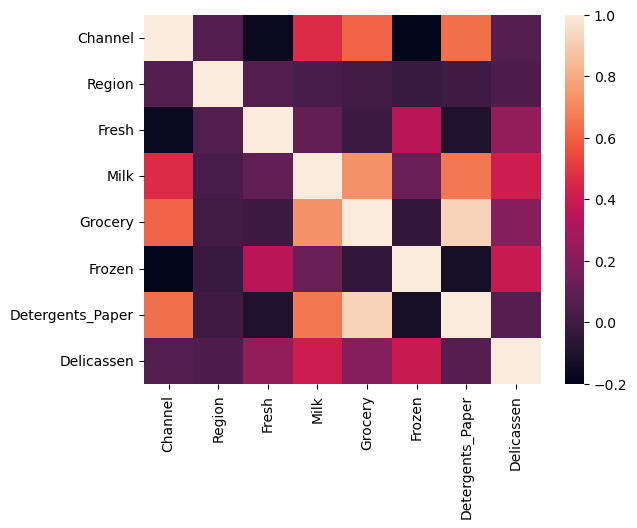

In [10]:
sns.heatmap(df.corr())

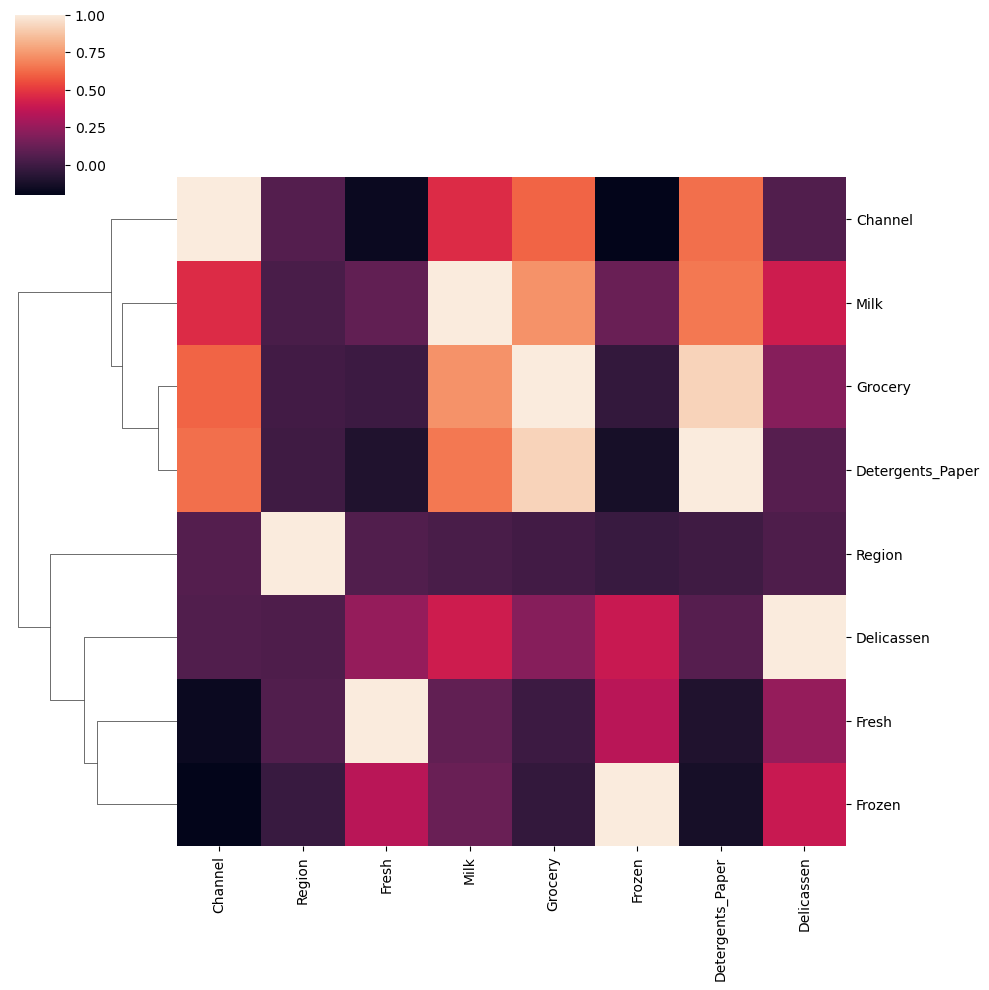

In [11]:
sns.clustermap(df.corr(),col_cluster=False)

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

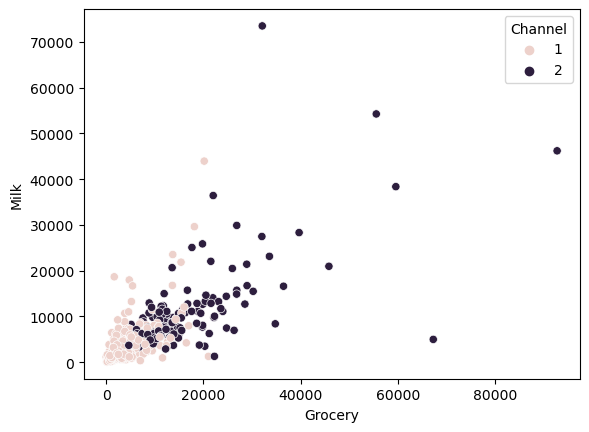

In [12]:
sns.scatterplot(data=df,x='Grocery',y='Milk',hue='Channel')

<AxesSubplot:xlabel='Grocery', ylabel='Detergents_Paper'>

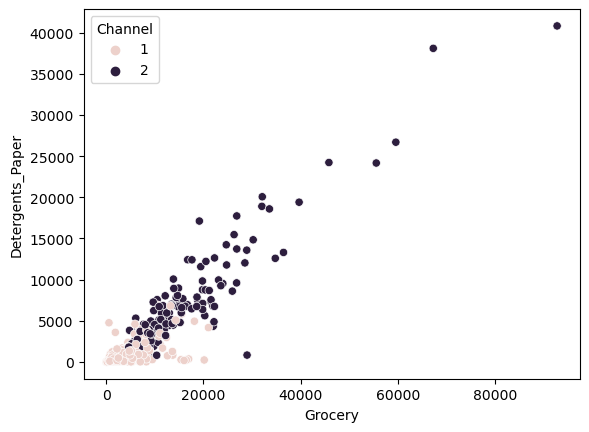

In [13]:
sns.scatterplot(data=df,x='Grocery',y='Detergents_Paper',hue='Channel')

<AxesSubplot:xlabel='Fresh', ylabel='Frozen'>

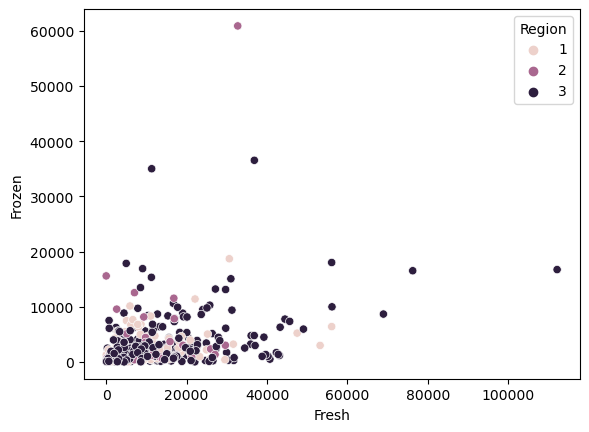

In [14]:
sns.scatterplot(data=df,x='Fresh',y='Frozen',hue='Region')

<Figure size 2000x1600 with 0 Axes>

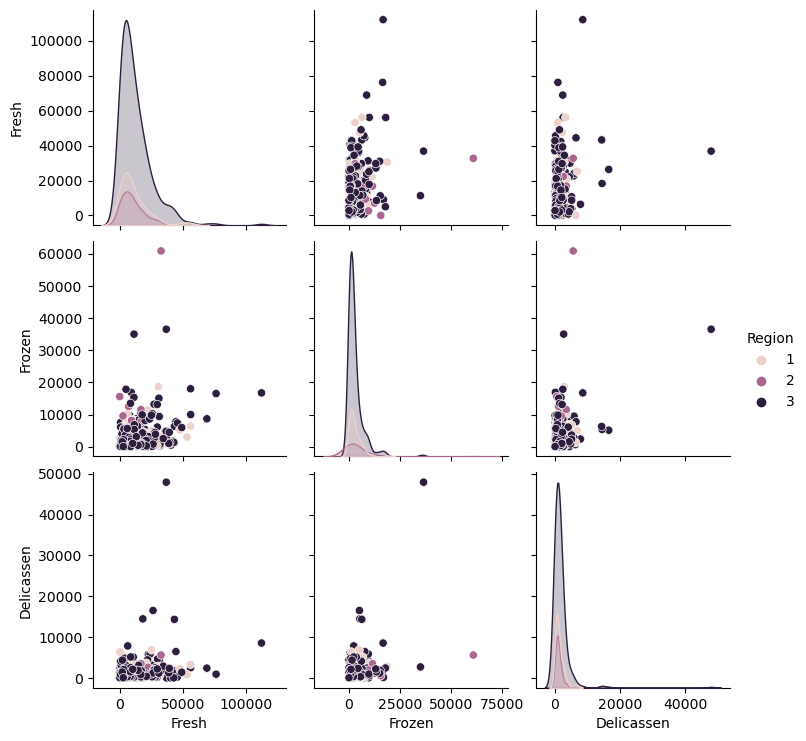

In [15]:
plt.figure(figsize=(10,8),dpi=200)
sns.pairplot(df[['Region','Fresh','Frozen','Delicassen']],hue='Region')

<Figure size 2000x1600 with 0 Axes>

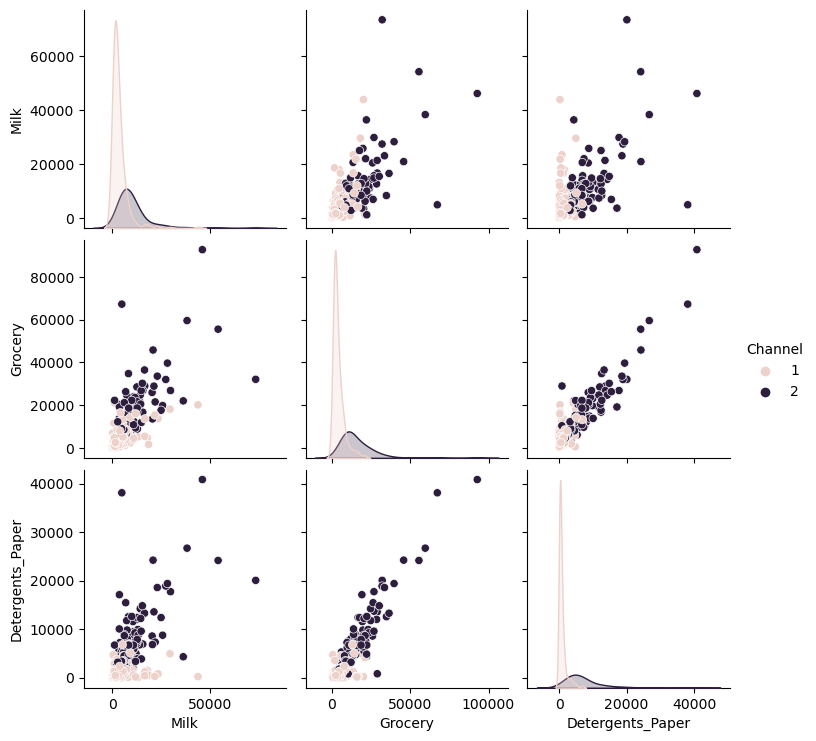

In [16]:
plt.figure(figsize=(10,8),dpi=200)
sns.pairplot(df[['Milk','Grocery','Detergents_Paper','Channel']],hue='Channel')

In [17]:
# scaling Data

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaled_X = scaler.fit_transform(df)

In [32]:
outliers_percentage = []

for eps in np.linspace(0.001,3,50):
    
    model = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    
    model.fit(scaled_X)
    
    percent = 100 * np.sum(model.labels_ == -1)/len(model.labels_)
    
    outliers_percentage.append(percent)

<AxesSubplot:>

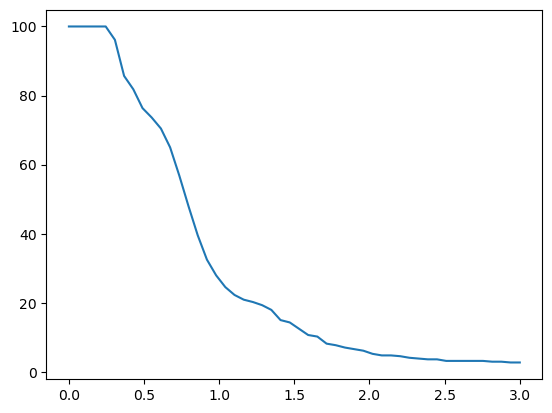

In [33]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outliers_percentage)

In [36]:
model = DBSCAN(eps=2)

In [37]:
model.fit(scaled_X)

DBSCAN(eps=2)

In [39]:
df['Label'] = model.labels_

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

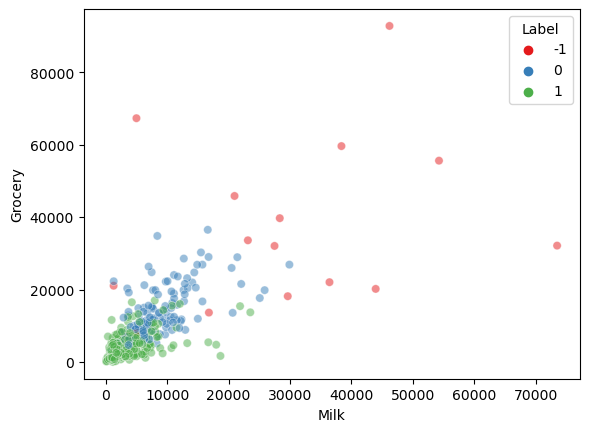

In [42]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Label',alpha=0.5,palette='Set1')

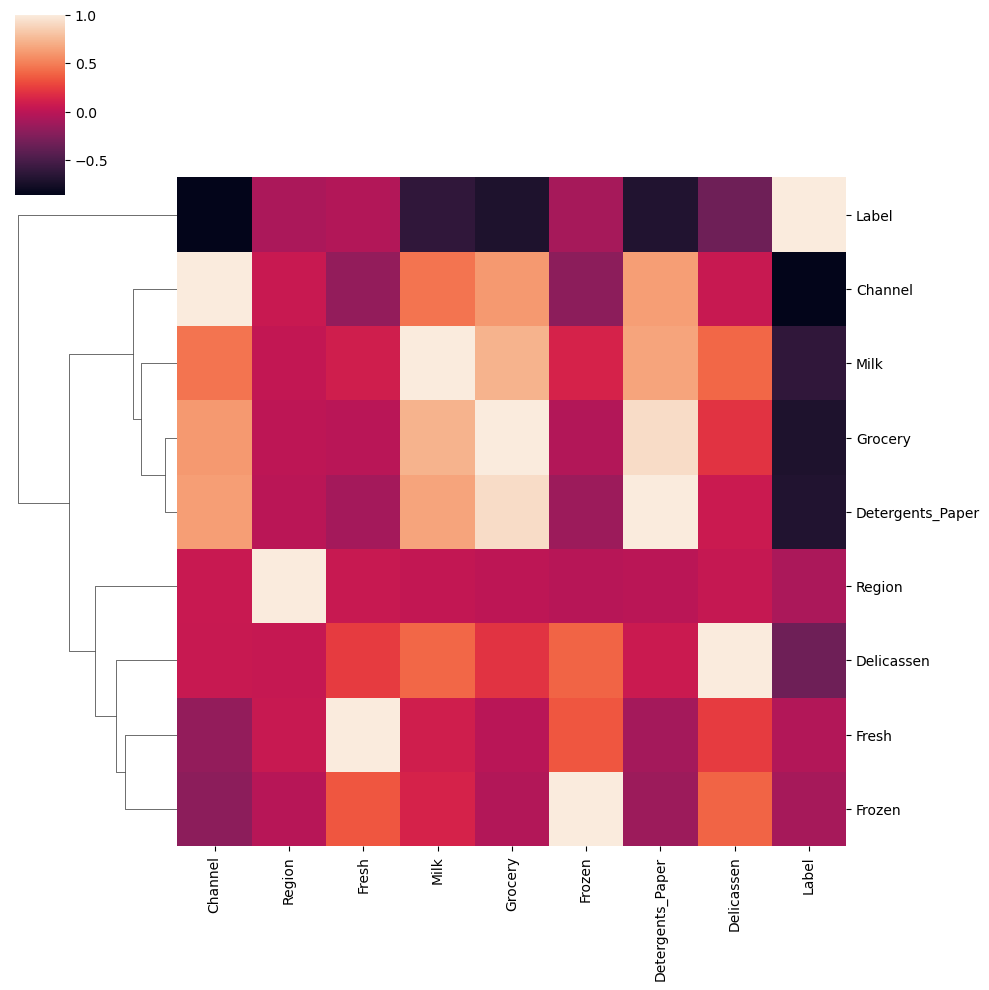

In [45]:
sns.clustermap(df.corr(),col_cluster=False)

<AxesSubplot:>

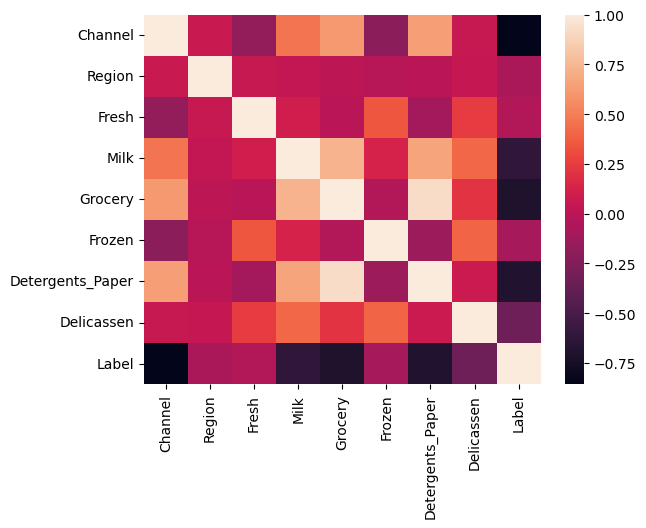

In [47]:
sns.heatmap(df.corr())

In [53]:
cats = df.drop(['Channel','Region'],axis=1)
cats_mean = cats.groupby('Label').mean()

In [54]:
cats_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Label,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


In [56]:
cats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,1


In [57]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()
data = scaler.fit_transform(cats_mean)
scaled_mean = pd.DataFrame(data,cats_mean.index,cats_mean.columns)

In [60]:
scaled_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Label,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.239292,0.341011,0.000000,0.380758,0.059938
1,0.203188,0.000000,0.000000,0.156793,0.000000,0.000000


<AxesSubplot:ylabel='Label'>

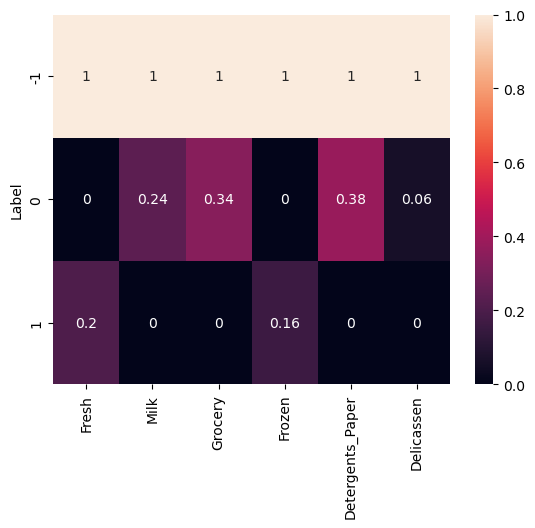

In [66]:
sns.heatmap(scaled_mean,annot=True)

<AxesSubplot:ylabel='Label'>

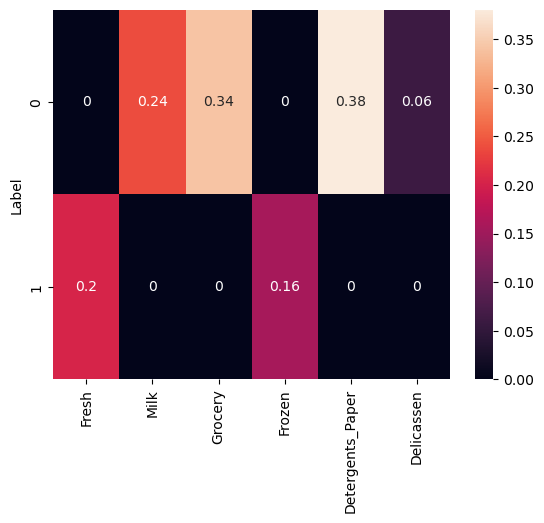

In [67]:
sns.heatmap(scaled_mean.iloc[[1,2]],annot=True)

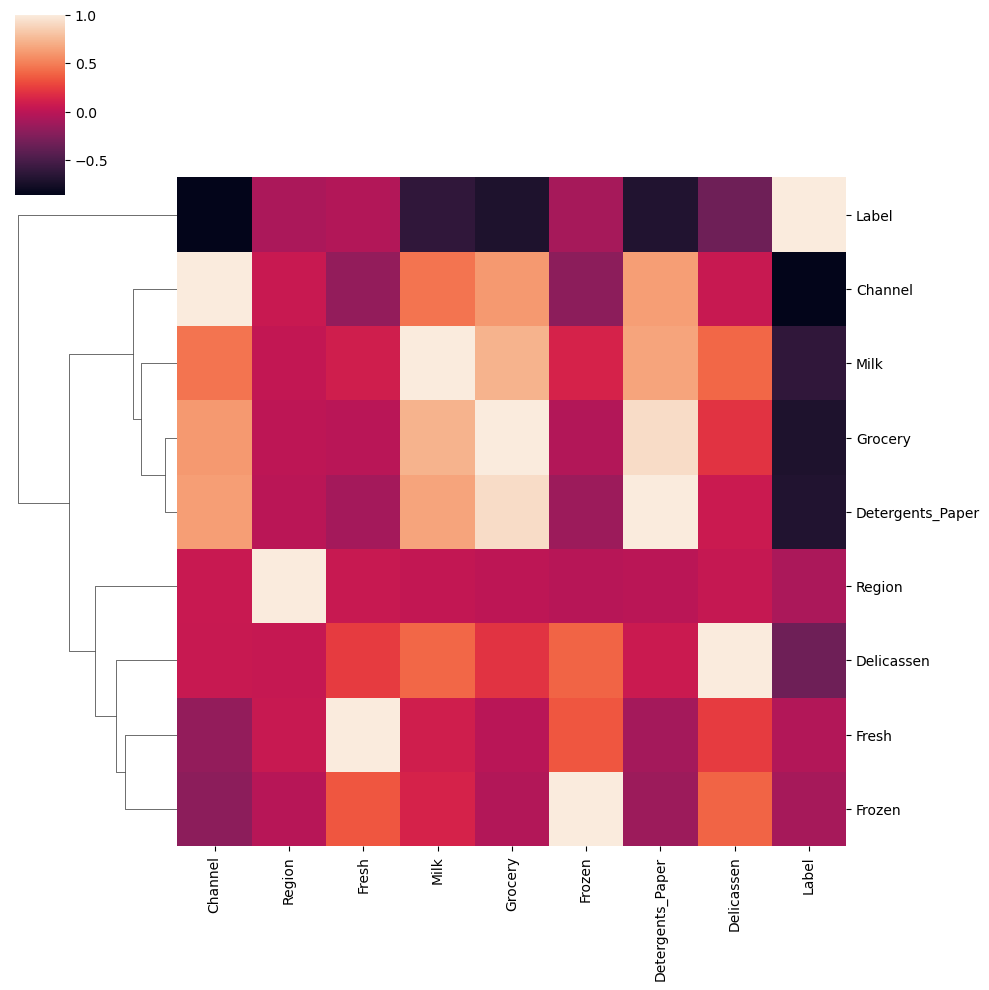

In [70]:
# compare above Labels predicted with actual dataframe
sns.clustermap(df.corr(),col_cluster=False)